<b><font size="20" color='white'>Nhóm 01 - House Price Predicting</font></b>
<h1><font size="15" color='white'>Member:</font></h1>
<h2><font size="15" color='white'>Nguyễn Thanh Sang - 20110393</font></h2>
<h2><font size="15" color='white'>Huỳnh Kỳ Sơn</font></h2>
<h2><font size="15" color='white'>Huỳnh Đăng Khoa</font></h2>


<b><font size="25" color='red'>Import libraries</font></b>


In [111]:
# Most important
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# other
import missingno as msno
import os

 <b><font size="25" color='red'>Load The DataSet</font></b>


In [112]:
## Read the Csv file
data = pd.read_csv(".\data\house_dataset\housing.csv")

In [113]:
df_housing=data.copy()

<b><font size="25" color='red'>Inspect The Data</font></b>


In [114]:
# Show the head of the dataFrame 
df_housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0         322         126         8.3252              452600        NEAR BAY  
1        2401        1138         8.3014              358500        NEAR BAY  
2         496         177         7.2574              352100        NEAR BAY  
3         558         219         5.6431              341300        NEAR BAY  
4         565         259         3.8462              342200        NEAR BAY

In [115]:
# Check info
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [116]:
## Some statistics on data 
df_housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [117]:
## check nulls of data 
df_housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [118]:
df_housing.dropna(inplace=True)
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  int64  
 3   total_rooms         20433 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  int64  
 6   households          20433 non-null  int64  
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  int64  
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.7+ MB


# Comment

* > Comment: It seems that Dataset is a contains 20640 instances and only 207 null values in total bedrooms feature, and also all datatypes is float64 as they are continuous numerical features except the (ocean_proximity) column which is nominal categorical Feature 


<b><font size="25" color='red'> Exploratory Data Analysis (EDA)</font></b>


In [119]:
# Explore the column ocean_proximity
ocean_values = df_housing["ocean_proximity"].value_counts()
ocean_values

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

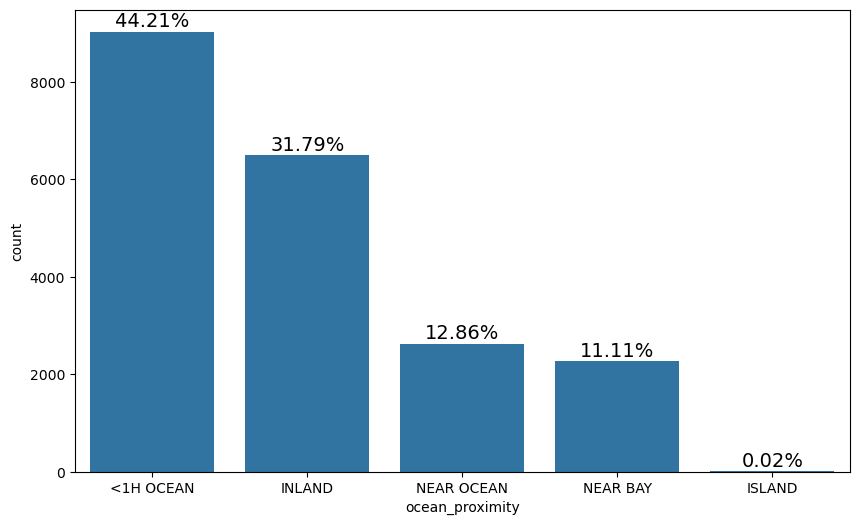

In [120]:
plt.figure(figsize=(10,6))
sns.countplot(x = "ocean_proximity",data=df_housing,order=ocean_values.index)

# showing the percentage
for i in range(ocean_values.shape[0]):
    count = ocean_values[i] 
    strt='{:0.2f}%'.format(100*count / df_housing.shape[0]) 
    plt.text(i, count+100, strt, ha='center', color='black', fontsize=14) 


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

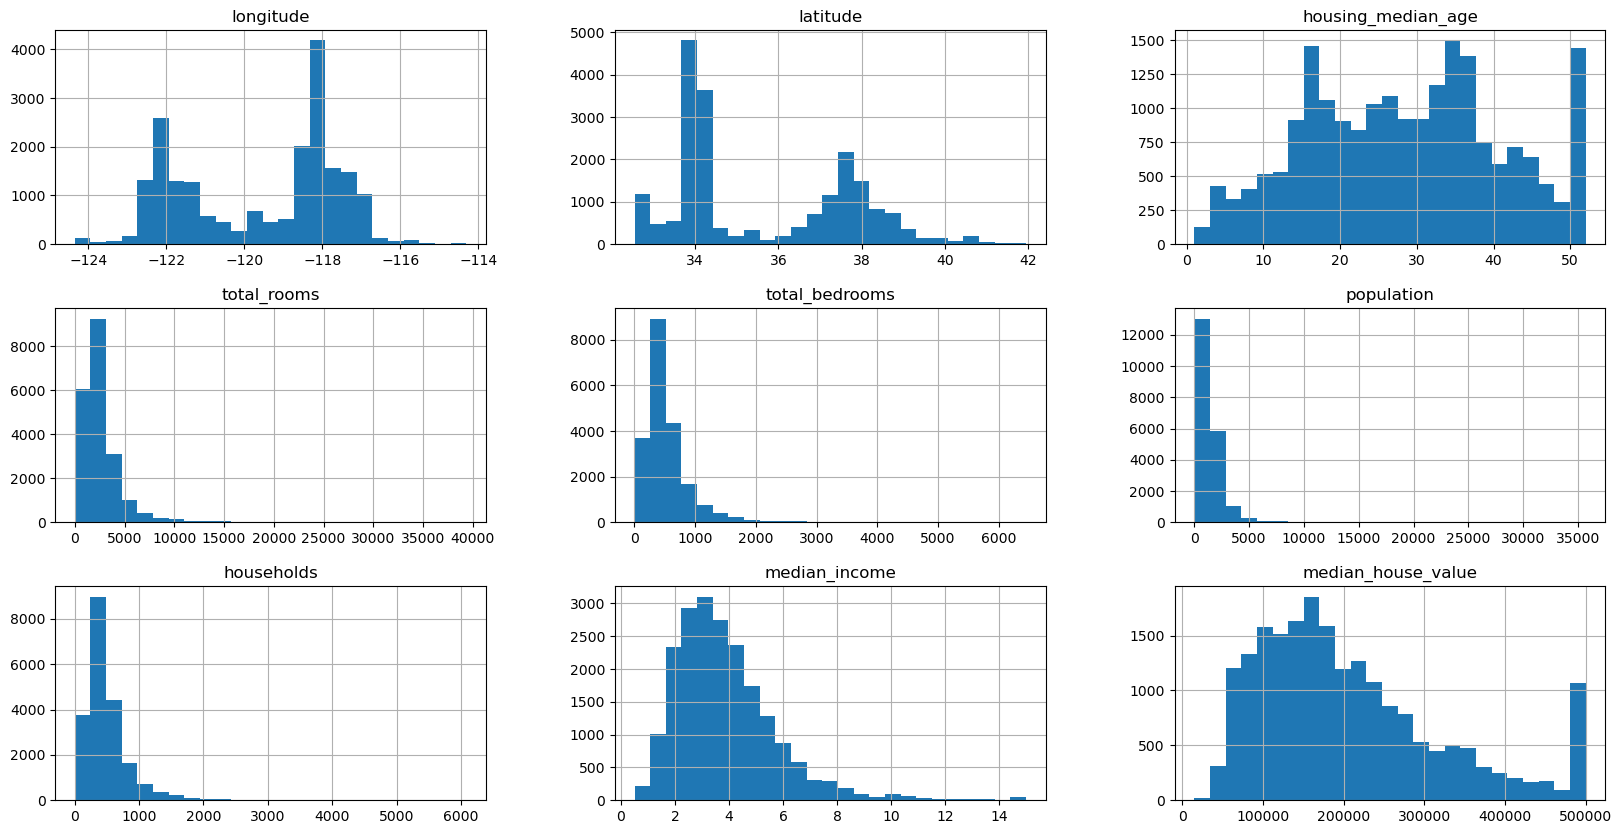

In [121]:
# Histogram
df_housing.hist(bins=25,figsize=(20,10))

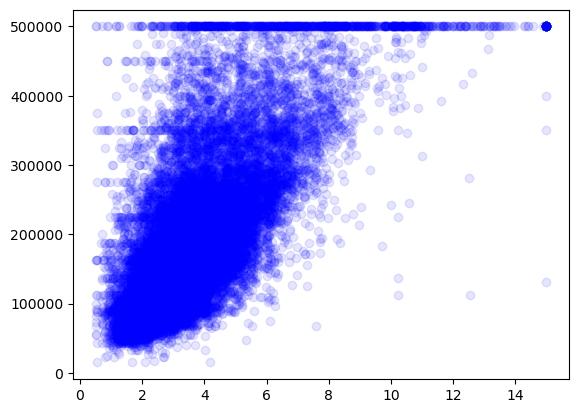

In [122]:
# check scatter plot between median_income and median_house_value
plt.scatter(df_housing["median_income"],df_housing["median_house_value"], alpha=0.1,color="b")

In [123]:
## Try to make median_income into bins
income_bins = pd.cut(df_housing["median_income"],
                     bins=[0,1.5,3,4.5,6,np.inf],
                     labels=["0 - 1.5","1.5 - 3","3 - 4.5","4.5 - 6"," > 6 "])

<Axes: xlabel='median_income', ylabel='count'>

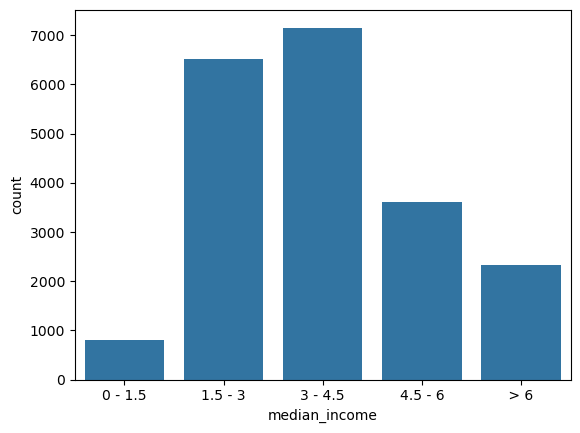

In [124]:
sns.countplot(x = income_bins)

# Comment 
* >  It seems that the (1H ocean) is about the half of the dataset the data is biased to this category.

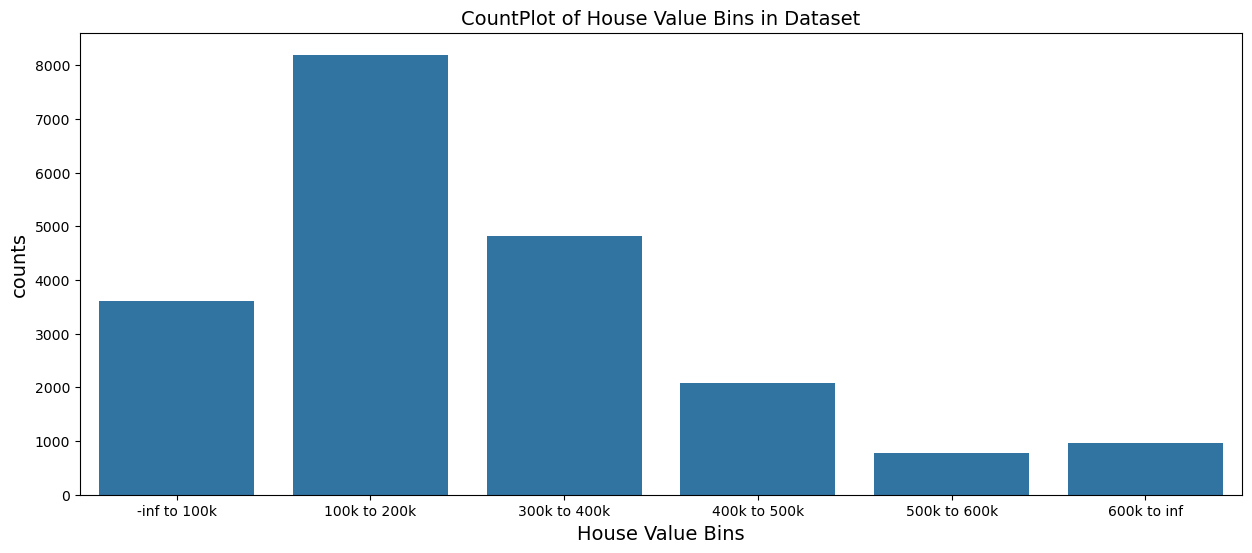

In [125]:
## Try for (median_house_vaLue) to convert it to chunks (bins) 
## Cut this numericaL feature to categorical for its vaLues to be in range will be in the some category 
## In the foLLowing example -- any value between range (0-100k) will be the same category, I name it (0-100k) 

house_value_bins = pd.cut(x=df_housing["median_house_value"],
                          bins=(-np.inf, 100000, 200000, 300000, 400000, 500000, np.inf),
                                labels=('-inf to 100k', '100k to 200k', '300k to 400k', '400k to 500k', '500k to 600k', '600k to inf') )
## countpLot for the above chunks 
plt.figure(figsize=(15,6)) 
sns.countplot(x=house_value_bins) 
plt.title('CountPlot of House Value Bins in Dataset', fontsize=14, c='k') 
plt.xlabel('House Value Bins', fontsize=14, c='k') 
plt.ylabel('counts', fontsize=14,c='k') 
plt.show() 


# Comment

* > The majority of house_value is between (100k-200k), Also the majority of median_income is between (3-4.5), someone can change his mind and split the dataset using (startified) method according to the most important feature as I think till now which is (median_income) but use (income_bins) as the stratified method requires categorical features not numerical' 

<b><font size="20" color='red'>Bivariate visualization</font></b>


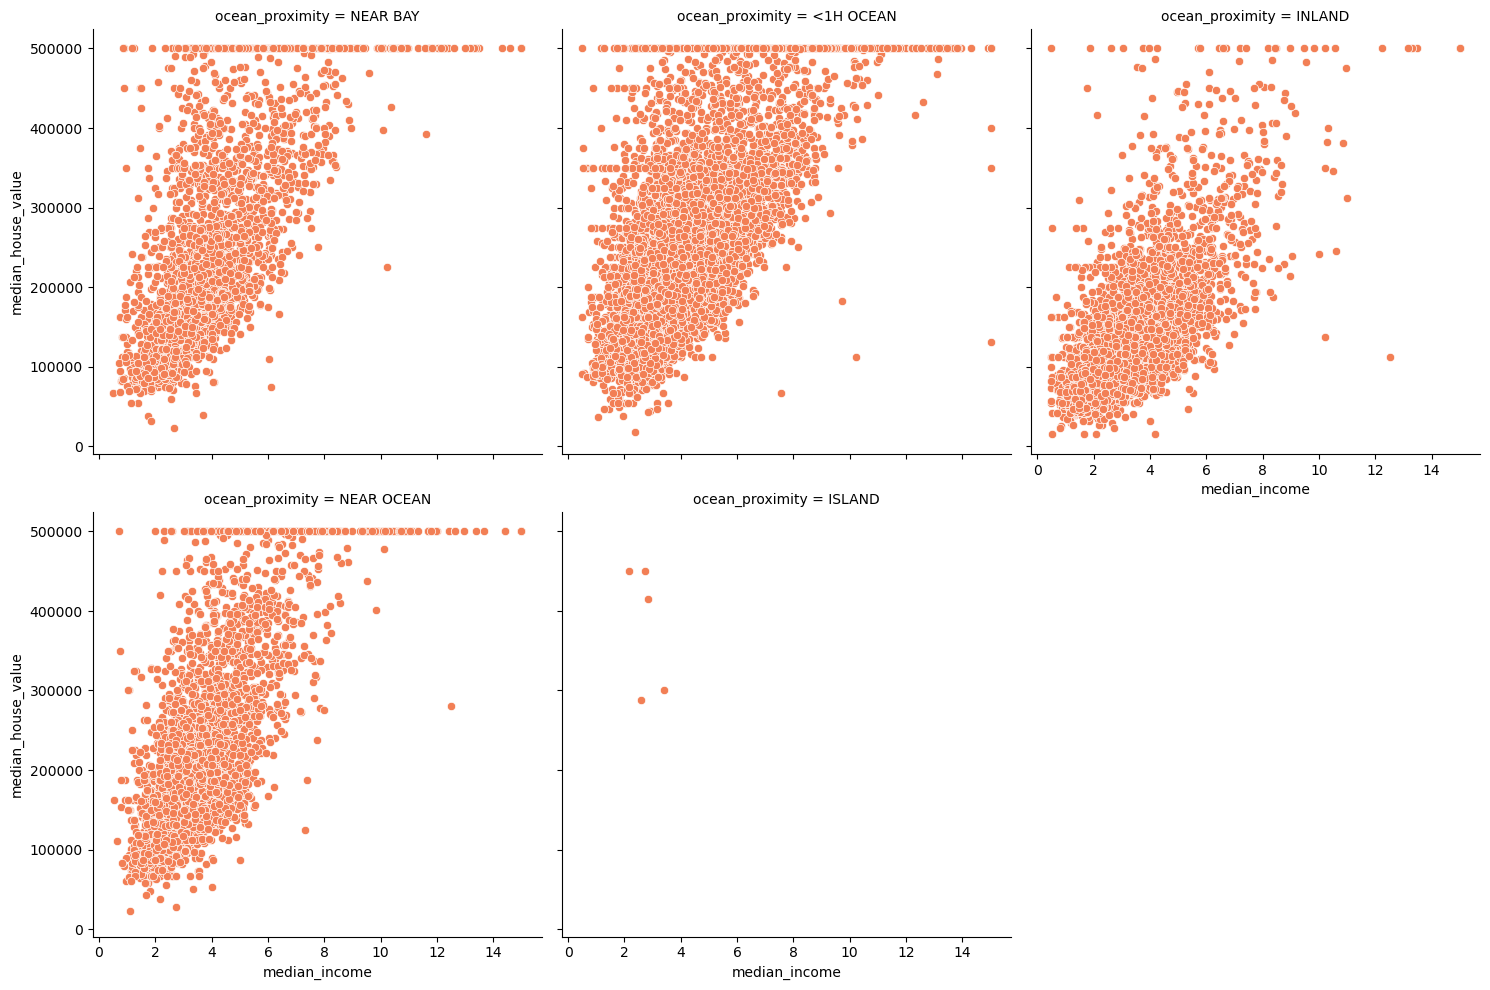

In [126]:
# Scatter plot between median_income and median_house_value at each ocean_proximity
sns.relplot(x="median_income",y='median_house_value',data=df_housing,col="ocean_proximity",col_wrap=3,color="#F27F55")

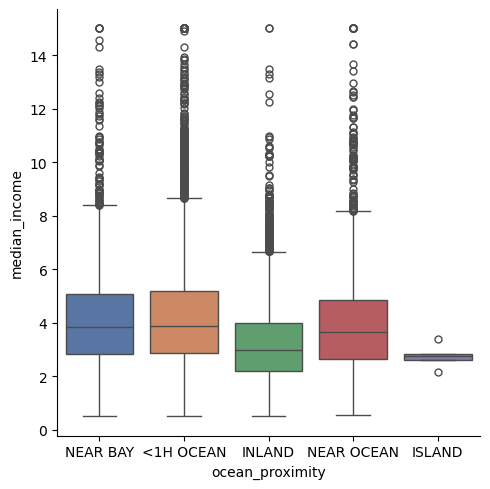

In [127]:
## Boxplot between ocean_proximity and median_income
sns.catplot(x='ocean_proximity', y="median_income", kind='box', data=df_housing, hue='ocean_proximity', palette='deep', legend=False)

# Comment

* > It seems that the Distribution of median_income is almost the same at ocean_proximity categories,
Also, it seems that the ISLAND median_income and median_house value is less than other categories and it makes
sense

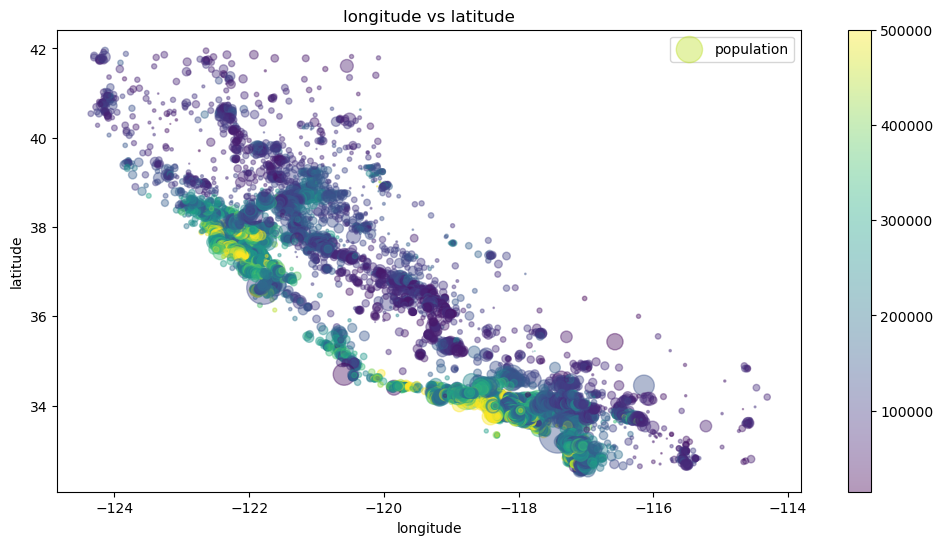

In [128]:
# Scatter plot between longitude and latitude
plt.figure(figsize=(12,6))
sc = plt.scatter(df_housing["longitude"],
                 df_housing["latitude"],
                 alpha=0.4,
                 cmap="viridis",
                 c=df_housing["median_house_value"],
                s=df_housing["population"]/50,
                label='population')
plt.colorbar(sc)
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.title("longitude vs latitude")
plt.legend()
plt.show()

# Comment

* > It seems that prices is higher near the ocean than the zones and these areas have higher population.

<b><font size="30" color='red'>Data Preprocessing</font></b>


# housing_median_age Column

<Axes: ylabel='housing_median_age'>

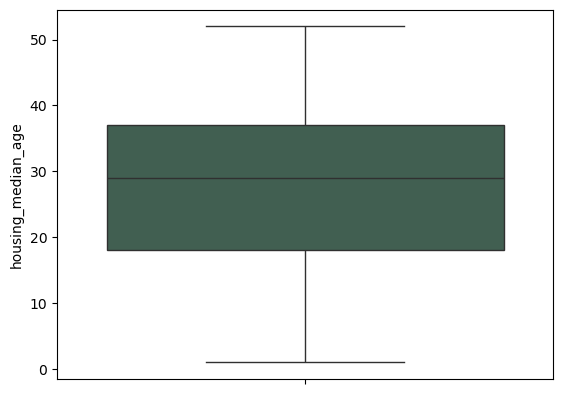

In [129]:
# Boxplot for the housing_median_age to check the outliers
sns.boxplot(y="housing_median_age",data=df_housing,color="#3C6451")

<Axes: xlabel='median_house_value', ylabel='housing_median_age'>

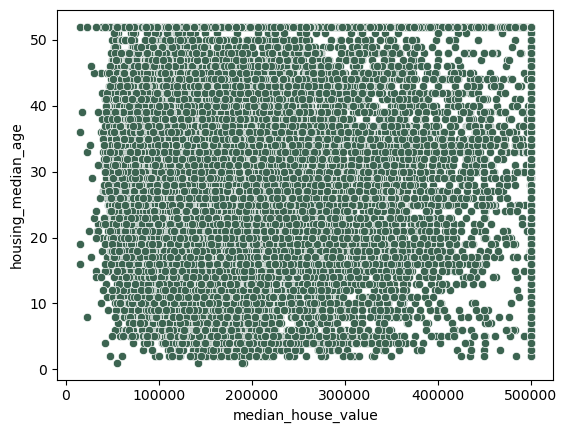

In [130]:
# scatterplot for the housing_median_age with median_house_value to check the outliers with respect to the target (median_house_value)
sns.scatterplot(x='median_house_value',y="housing_median_age",data=df_housing,color='#3C6451')

## total_bedrooms Column


<Axes: ylabel='total_bedrooms'>

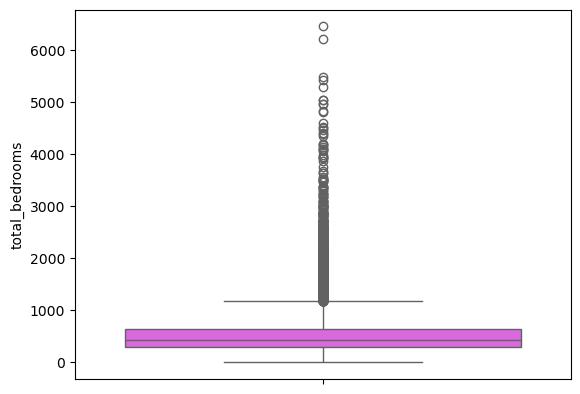

In [131]:
# Boxplot for the total_bedrooms to check the outliers
sns.boxplot(y="total_bedrooms",data=df_housing,color="#EC55F2")

<Axes: xlabel='total_bedrooms', ylabel='median_house_value'>

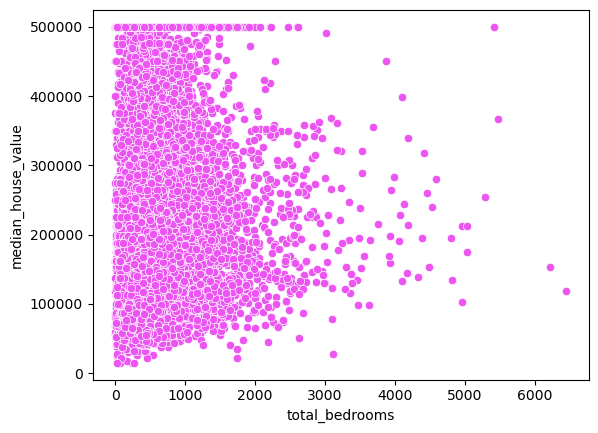

In [132]:
# scatterplot for the total_bedrooms with median_house_value to check the outliers with respect to the target (median_house_value)
sns.scatterplot(y='median_house_value',x="total_bedrooms",data=df_housing,color='#EC55F2')

In [133]:
# Fill the null values in total bedrooms column by random
Fill_total_bedrooms=df_housing["total_bedrooms"].dropna().unique()
df_housing['total_bedrooms'] = df_housing['total_bedrooms'].fillna(pd.Series(np.random.choice(Fill_total_bedrooms,size=len(df_housing.index))))

In [134]:
# it seems from the scatter plot to delete from the total_bedrooms column the values higher than 5000 as outliers
df_housing = df_housing[df_housing["total_bedrooms"]<=5000]

##  households Column

<Axes: ylabel='households'>

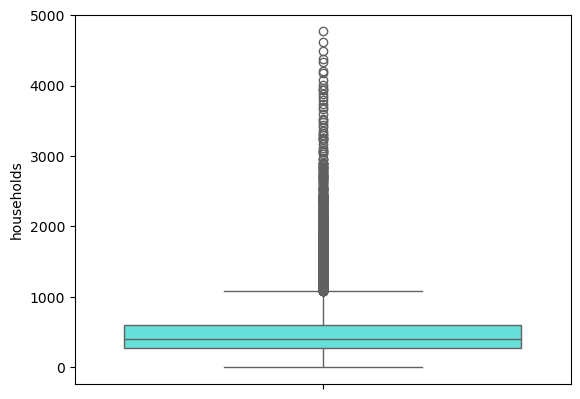

In [135]:
# Boxplot for the households to check the outliers
sns.boxplot(y="households",data=df_housing,color="#51F3E8")

<Axes: xlabel='households', ylabel='median_house_value'>

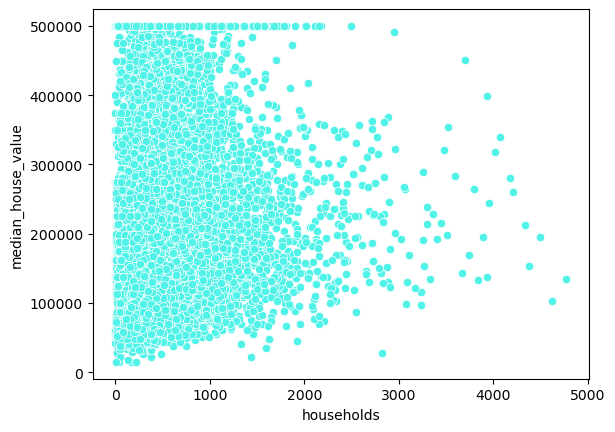

In [136]:
# scatterplot for the households with median_house_value to check the outliers with respect to the target (median_house_value)
sns.scatterplot(y='median_house_value',x="households",data=df_housing,color='#51F3E8')

In [137]:
# it seems from the scatter plot to delete from the households column the values higher than 4000 as outliers
df_housing = df_housing[df_housing["households"]<=4400]

##  population Column


<Axes: ylabel='population'>

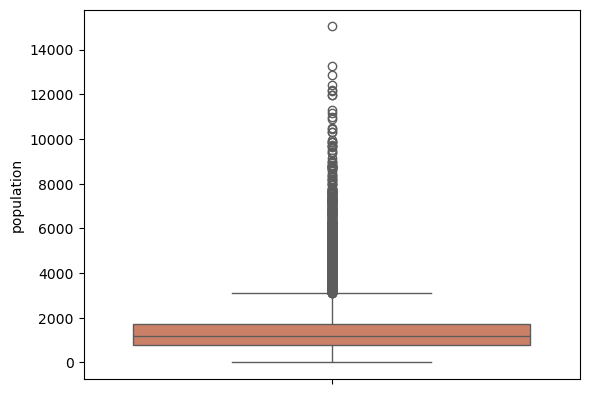

In [138]:
# Boxplot for the population to check the outliers
sns.boxplot(y="population",data=df_housing,color='#DB7958')

<Axes: xlabel='population', ylabel='median_house_value'>

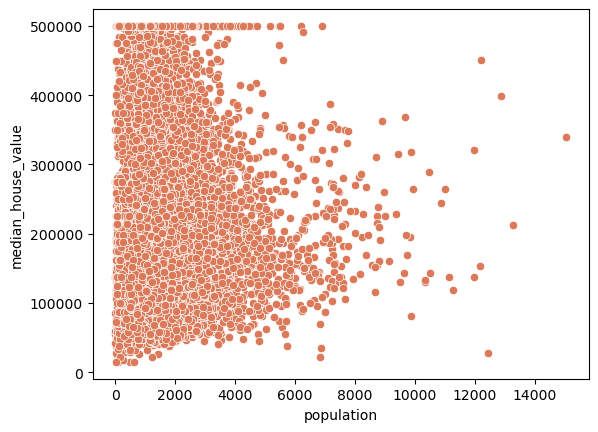

In [139]:
# scatterplot for the housing_median_age with population to check the outliers with respect to the target (median_house_value)
sns.scatterplot(y='median_house_value',x="population",data=df_housing,color='#DB7958')

In [140]:
# it seems from the scatter plot to delete from the population column the values higher than 10000 as outliers
df_housing = df_housing[df_housing["population"]<10000]

# median_income column

<Axes: ylabel='median_income'>

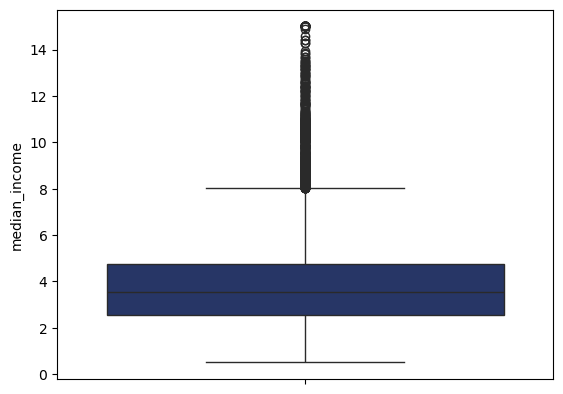

In [141]:
# Boxplot for the median_income to check the outliers
sns.boxplot(y="median_income",data=df_housing,color='#1D3070')

<Axes: xlabel='median_income', ylabel='median_house_value'>

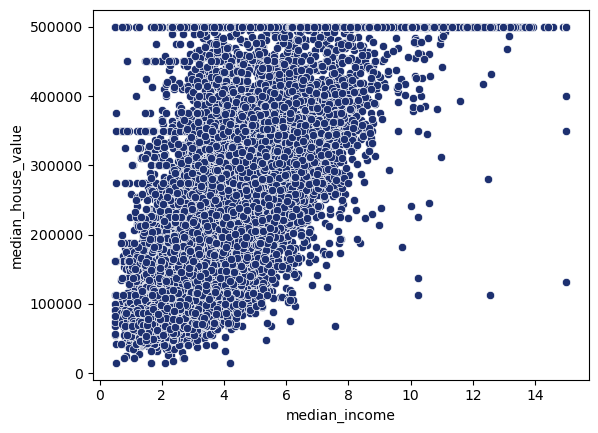

In [142]:
# scatterplot for the median_income with median_house_value to check the outliers with respect to the target (median_house_value)
sns.scatterplot(y='median_house_value',x="median_income",data=df_housing,color='#1D3070')

In [143]:
# it seems from the scatter plot to delete from the median_income column the values higher than 10 as outliers
df_housing = df_housing[df_housing["median_income"]<=12]

# ocean_proximity column

In [144]:
# covert the column ocean_proximity to numeric by labelencoder
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
df_housing['ocean_proximity'] = l.fit_transform(df_housing['ocean_proximity'])

<b><font size="25" color='red'>Prediction Part</font></b>


 <b><font color='blue' size=6>Split data</font></b>

In [294]:
df_housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [295]:
house = df_housing[['housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity',]]

In [296]:
# split the data to x and y
x = house.drop(["median_house_value"],axis=1).values
y= house['median_house_value'].values


<b><font color='blue' size=6>train test split</font></b>

In [334]:
# import the train_test_split
from sklearn.model_selection import train_test_split

In [336]:
# split the data into train and test
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2)

In [282]:
# train_data = x_train.join(y_train)
# train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
# train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
# train_data['population'] = np.log(train_data['population'] + 1)
# train_data['households'] = np.log(train_data['households'] + 1)

# x_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']

# test_data = x_test.join(y_test)
# test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)
# test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
# test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
# test_data['population'] = np.log(test_data['population'] + 1)
# test_data['households'] = np.log(test_data['households'] + 1)

# x_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

<b><font size="10" color='red'>Data scaling using robust regression</font></b>


In [337]:
from sklearn.preprocessing import RobustScaler
ro_scaler = RobustScaler()
x_train = ro_scaler.fit_transform(x_train)
x_test = ro_scaler.fit_transform(x_test)

<center><b><font size="8" color='red'>Linear regression model</font></b></center>


In [338]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [339]:
reg.score(x_train,y_train)

0.5809065054813116

In [340]:
reg.score(x_test,y_test)

0.5713666932924363

In [341]:
reg.intercept_

188482.9721392119

In [342]:
reg.coef_

array([ 35932.34298448, -42776.17695356,  46476.83669638, -36620.19851975,
        40846.54961796, 113688.52359494,   4531.46209473])

In [343]:
pd.DataFrame(reg.coef_,house.columns[:-1],columns=['coeficients'])

coeficients
housing_median_age   35932.342984
total_rooms         -42776.176954
total_bedrooms       46476.836696
population          -36620.198520
households           40846.549618
median_income       113688.523595
median_house_value    4531.462095

In [344]:
y_pred_1 = reg.predict(x_test)

In [345]:
df_1 = pd.DataFrame({'y_test':y_test,'Y_pred':y_pred_1})

In [346]:
df_1.head()

y_test         Y_pred
0  157500  208645.400481
1  175200  185486.177646
2   97500  134010.759421
3  187500  136665.080357
4   94600  108144.071028

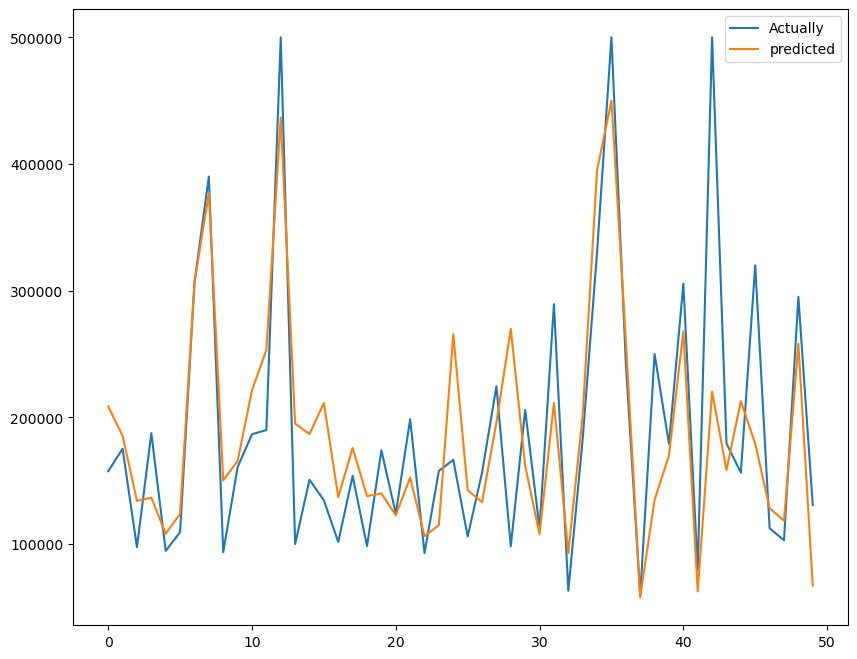

In [347]:
plt.figure(figsize=(10,8))
plt.plot(df_1[:50])
plt.legend(["Actually","predicted"])

<center><b><font size="25" color='red'>Ridge Model</font></b></center>


In [348]:
from sklearn import linear_model
rid = linear_model.Ridge(alpha=0.9)
rid.fit(x_train,y_train)

Ridge(alpha=0.9)

In [349]:
rid.score(x_train,y_train)

0.5809064715833749

In [350]:
rid.score(x_test,y_test)

0.5713656522473902

In [351]:
rid.intercept_

188486.3294973565

In [352]:
rid.coef_

array([ 35928.51753818, -42729.15154704,  46425.18277039, -36611.39927137,
        40841.77219285, 113663.06350395,   4531.82154876])

In [353]:
pd.DataFrame(rid.coef_,house.columns[:-1],columns=['coeficients'])

coeficients
housing_median_age   35928.517538
total_rooms         -42729.151547
total_bedrooms       46425.182770
population          -36611.399271
households           40841.772193
median_income       113663.063504
median_house_value    4531.821549

In [354]:
y_pred_2 = rid.predict(x_test)

In [355]:
df_2 = pd.DataFrame({'y_test':y_test,'Y_pred':y_pred_2})

In [356]:
df_2.head()

y_test         Y_pred
0  157500  208644.484708
1  175200  185493.360496
2   97500  134011.297631
3  187500  136654.882276
4   94600  108151.548723

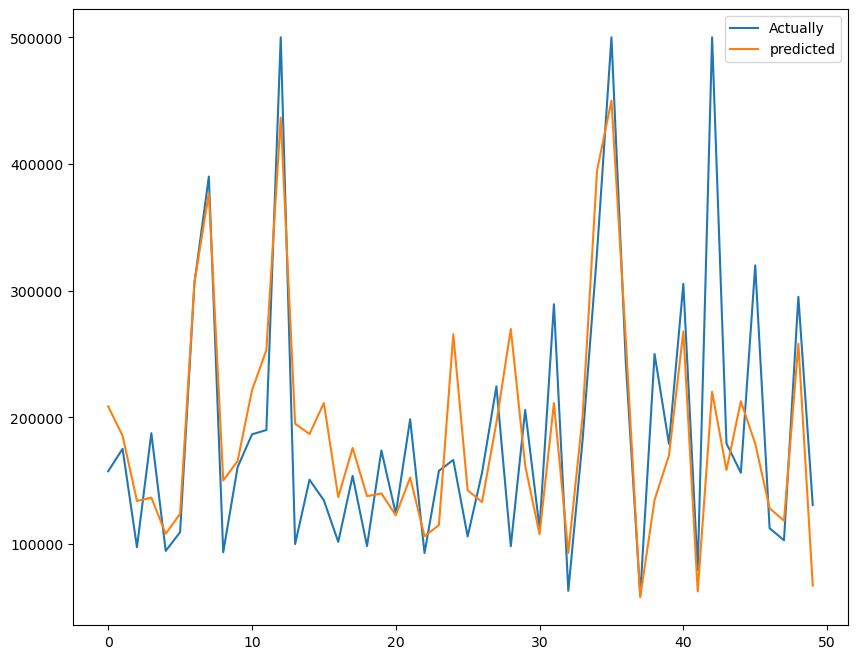

In [357]:
plt.figure(figsize=(10,8))
plt.plot(df_2[:50])
plt.legend(["Actually","predicted"])

<center><b><font size="25" color='red'>Lasso Model</font></b></center>

In [358]:
from sklearn import linear_model
lass = linear_model.Lasso(alpha=0.9)
lass.fit(x_train,y_train)

Lasso(alpha=0.9)

In [359]:
lass.score(x_train,y_train)

0.5809065024414037

In [360]:
lass.score(x_test,y_test)

0.5713669706829778

In [361]:
lass.intercept_

188483.71239102725

In [362]:
lass.coef_

array([ 35930.89519714, -42763.22309481,  46465.54452709, -36614.77373756,
        40839.29917864, 113682.8494917 ,   4531.30820883])

In [363]:
pd.DataFrame(lass.coef_,house.columns[:-1],columns=['coeficients'])

coeficients
housing_median_age   35930.895197
total_rooms         -42763.223095
total_bedrooms       46465.544527
population          -36614.773738
households           40839.299179
median_income       113682.849492
median_house_value    4531.308209

In [364]:
y_pred_3 = lass.predict(x_test)

In [365]:
df_3 = pd.DataFrame({'y_test':y_test,'Y_pred':y_pred_3})

In [366]:
df_3.head()

y_test         Y_pred
0  157500  208645.244782
1  175200  185489.577527
2   97500  134008.767537
3  187500  136660.971361
4   94600  108142.714140

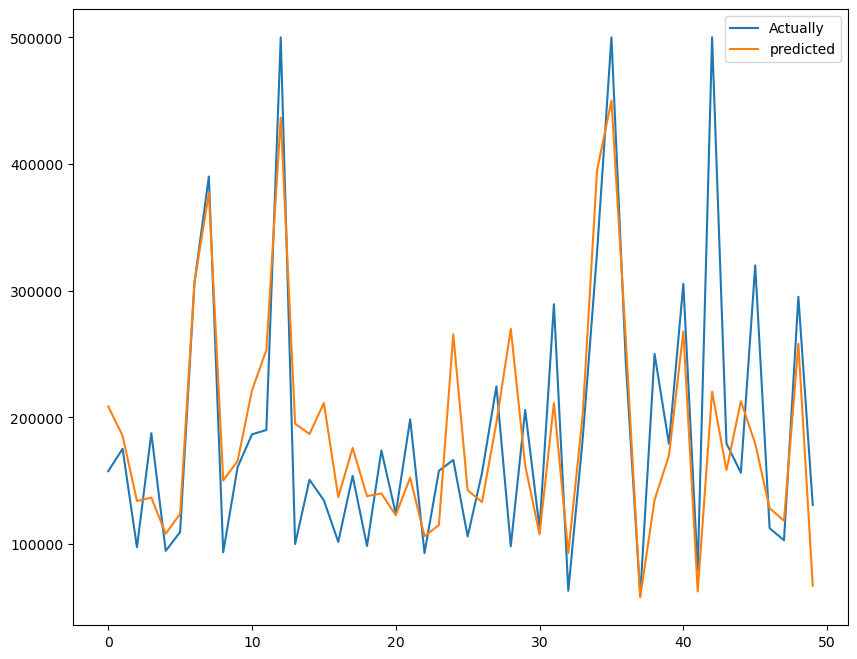

In [367]:
plt.figure(figsize=(10,8))
plt.plot(df_3[:50])
plt.legend(["Actually","predicted"])

<center><b><font size="25" color='red'>Random Forest</font></b></center>

In [396]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=100, max_depth=30)

forest.fit(x_train, y_train)

RandomForestRegressor(max_depth=30)

In [397]:
forest.score(x_train, y_train)

0.958511326140267

In [398]:
forest.score(x_test, y_test)

0.7025375057159635

In [403]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()
param_grid = {
    "n_estimators": [100, 200, 300],
    "min_samples_split": [2, 4],
    "max_depth": [None, 4 , 8]
}

grid_search = GridSearchCV(forest, param_grid,cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score=True)

grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [404]:
grid_search.best_estimator_

RandomForestRegressor(min_samples_split=4, n_estimators=300)

In [405]:
grid_search.best_estimator_.score(x_test, y_test)

0.7026779275082833

In [399]:
y_pred_4 = forest.predict(x_test)

In [400]:
df_4 = pd.DataFrame({'y_test':y_test,'Y_pred':y_pred_4})

In [401]:
df_4.head()

y_test     Y_pred
0  157500  313145.01
1  175200  163654.00
2   97500  157193.01
3  187500  193803.00
4   94600  128794.00

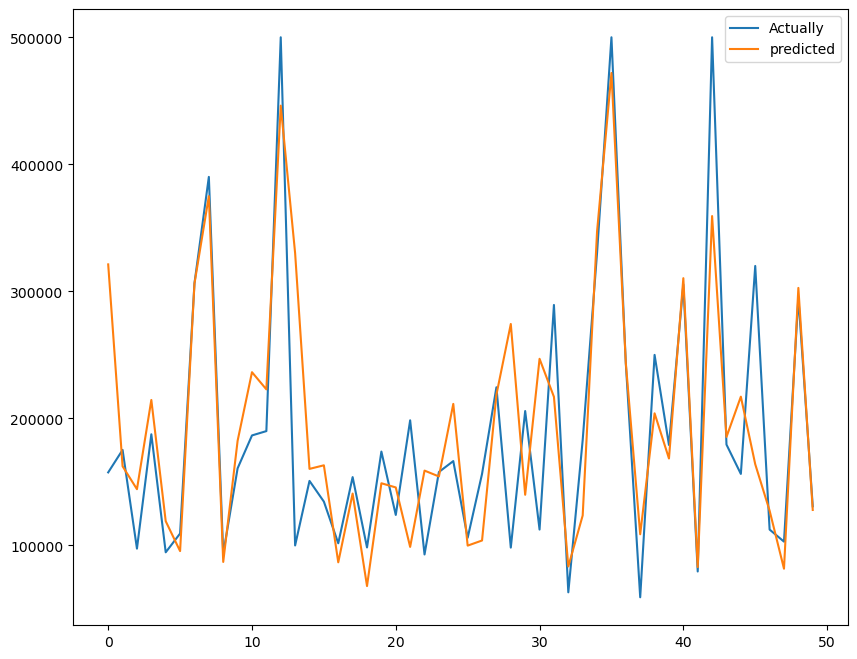

In [389]:
plt.figure(figsize=(10,8))
plt.plot(df_4[:50])
plt.legend(["Actually","predicted"])

<center><b><font size="25" color='red'>Decision Tree</font></b></center>

<center><b><font size="25" color='red'>Evaluating models</font></b></center>


<b><font size="5" color='blue'>Linear reg evaluation</font></b>


In [181]:
#import r2_score 
from sklearn.metrics import r2_score

In [182]:
# calculate r2_score for the model
reg_score = r2_score(y_test,y_pred_1)

In [183]:
# calculate adjust r2_score for the model
p = len(x_train[0])
n = len(y_train)
adj_r2 = 1 - (1-reg_score)*(n-1)/(n-p-1)
adj_r2

0.5772253089301187

In [184]:
# check that adjust r2_score is less than r2_score for the model
adj_r2 < reg_score

True

In [185]:
# import mean_absolute_error and mean_absolute_percentage_error and mean_squared_error
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error

In [186]:
# calculate mean_squared_error
mse = mean_squared_error(y_test , y_pred_1)
mse

5447318398.506844

In [187]:
# calculate mean_absolute_error
mae = mean_absolute_error(y_test , y_pred_1)
mae

54563.29019782247

In [188]:
# calculate mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test , y_pred_1)
mape

0.3334234513058102

In [189]:
# calculate root_mean_squared_error
reg_mse = mean_squared_error(y_test , y_pred_1)
reg_rmse = np.sqrt(reg_mse)
reg_rmse

73805.95096946346


<b><font size="5" color='blue'>Ridge Evaluation</font></b>


In [190]:
# calculate r2_score for the model
rid_score = r2_score(y_test,y_pred_2)
rid_score

0.5774189248330872

In [191]:
# calculate adjust r2_score for the model
p = len(x_train[0])
n = len(y_train)
adj_r2 = 1 - (1-rid_score)*(n-1)/(n-p-1)
adj_r2

0.5772244814276992

In [192]:
# check that adjust r2_score is less than r2_score for the model
adj_r2 < rid_score

True

In [193]:
# calculate mean_squared_error
rid_mse = mean_squared_error(y_test , y_pred_2)
rid_mse

5447329060.614224

In [194]:
# calculate mean_absolute_error
rid_mae = mean_absolute_error(y_test , y_pred_2)
rid_mae

54564.073603503646

In [195]:
# calculate mean_absolute_percentage_error
rid_mape = mean_absolute_percentage_error(y_test , y_pred_2)
rid_mape

0.33344332250456776

In [196]:
# calculate root_mean_squared_error
rid_mse = mean_squared_error(y_test , y_pred_2)
rid_rmse = np.sqrt(reg_mse)
rid_rmse

73805.95096946346


<b><font size="5" color='blue'>Lasso Evaluation</font></b>


In [197]:
# calculate r2_score for the model
lass_score = r2_score(y_test,y_pred_3)

In [198]:
# calculate adjust r2_score for the model
p = len(x_train[0])
n = len(y_train)
adj_r2 = 1 - (1-lass_score)*(n-1)/(n-p-1)
adj_r2

0.577224946420385

In [199]:
# check that adjust r2_score is less than r2_score for the model
adj_r2 < lass_score

True

In [200]:
# calculate mean_squared_error
lass_mse = mean_squared_error(y_test , y_pred_3)
lass_mse

5447323069.330296

In [201]:
# calculate mean_absolute_error
lass_mae = mean_absolute_error(y_test , y_pred_3)
lass_mae

54563.41961697021

In [202]:
# calculate mean_absolute_percentage_error
lass_mape = mean_absolute_percentage_error(y_test , y_pred_3)
lass_mape

0.333426937427602

In [203]:
# calculate root_mean_squared_error
lass_mse = mean_squared_error(y_test , y_pred_3)
lass_rmse = np.sqrt(reg_mse)
lass_rmse

73805.95096946346

<b><font size="5" color='blue'>Random Forest Evaluation</font></b>

In [376]:
# calculate r2_score for the model
forest_score = r2_score(y_test,y_pred_4)

In [377]:
# calculate adjust r2_score for the model
p = len(x_train[0])
n = len(y_train)
adj_r2 = 1 - (1-forest_score)*(n-1)/(n-p-1)
adj_r2

0.701011159501933

In [378]:
# check that adjust r2_score is less than r2_score for the model
adj_r2 < forest_score

True

In [379]:
# calculate mean_squared_error
forest_mse = mean_squared_error(y_test , y_pred_4)
forest_mse

3790767299.511083

In [380]:
# calculate mean_absolute_percentage_error
forest_mape = mean_absolute_percentage_error(y_test , y_pred_4)
forest_mape

0.252525154107369

In [381]:
# calculate root_mean_squared_error
forest_mse = mean_squared_error(y_test , y_pred_4)
forest_rmse = np.sqrt(reg_mse)
forest_rmse

73805.95096946346

<b><font size="20" color='red'>Comapring The Four Models</font></b>


In [382]:
models = ["Linear","Ridge","Lasso","Forest"]
data = [[reg_score,reg_mse],[rid_score,rid_mse],[lass_score,lass_mse],[forest_score, forest_mse]]
cols = ['r2_score','RMSE']
pd.DataFrame(data = data , columns=cols , index = models).sort_values(ascending=False , by=["r2_score"])

r2_score          RMSE
Lasso   0.701140  5.447323e+09
Forest  0.701140  3.790767e+09
Linear  0.577420  5.447318e+09
Ridge   0.577419  5.447329e+09